In [8]:
# pip install --ignore-installed --upgrade tensorflow-gpu

In [9]:
# conda install tensorflow

In [10]:
# !pip3 install keras-visualizer

In [11]:
# conda install graphviz

In [7]:
# conda install python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\LG\.conda\envs\gpu_env

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-graphviz-0.20.1     |   py38haa95532_0          63 KB
    ------------------------------------------------------------
                                           Total:          63 KB

The following NEW packages will be INSTALLED:

  python-graphviz    pkgs/main/win-64::python-graphviz-0.20.1-py38haa95532_0 None




python-graphviz-0.20 | 63 KB     |            |   0% 
python-graphviz-0.20 | 63 KB     | ##5        |  25% 
python-graphviz-0.20 | 63 KB     | ########## | 100% 
python-graphviz-0.20 | 63 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Retrieving notices

In [ ]:
# conda install pydot

# Version 1

In [12]:
%tensorflow_version 1.x
# The above magic forces google colab to load only the TF 1.x
# TensorFlow Hello World
# The code below will not work with TF 2.X because of
# eager execution in TF 2.X is not compatible with TF 1.x
import tensorflow as tf
sess = tf.Session()
a = tf.constant(10)
b = tf.constant(32)
print(sess.run(a+b))    

UsageError: Line magic function `%tensorflow_version` not found.


In [13]:
# TensorFlow Hello World
# Forcing the TF 2.X library to work in TF 1.X compatibility mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution() # need to disable eager in TF2.x
import tensorflow.compat.v1 as tf
sess = tf.Session()
a = tf.constant(10)
b = tf.constant(32)
print(sess.run(a+b))

42


In [14]:
# Linear Regression using Tensorflow
import tensorflow as tf
# Force TF1.X compatibility mode when using TF 2.X library
tf.compat.v1.disable_eager_execution() # need to disable eager in TF2.x
import tensorflow.compat.v1 as tf
import numpy as np
# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b
# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
# Before starting, initialize the variables. We will 'run' this first.
init = tf.initialize_all_variables()
# Launch the graph.
sess = tf.Session()
sess.run(init)
# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))
# Learns best fit is W: [0.1], b: [0.3]


Instructions for updating:
Use `tf.global_variables_initializer` instead.
0 [-0.05025253] [0.6529094]
20 [0.02275528] [0.34917134]
40 [0.07763534] [0.31423658]
60 [0.09352478] [0.3041219]
80 [0.09812526] [0.30119342]
100 [0.09945721] [0.30034554]
120 [0.09984285] [0.30010006]
140 [0.09995451] [0.30002898]
160 [0.09998684] [0.3000084]
180 [0.09999619] [0.30000243]
200 [0.09999891] [0.30000073]


In [15]:
%tensorflow_version 1.x
import tensorflow as tf
# Set up a linear classifier.
classifier = tf.estimator.LinearClassifier()
# Train the model on some example data.
classifier.train(input_fn=train_input_fn, steps=2000)
# Use it to predict.
predictions = classifier.predict(input_fn=predict_input_fn)

UsageError: Line magic function `%tensorflow_version` not found.


In [16]:
%tensorflow_version 1.x
# Using TensorFLow for iris data classification
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing
import tensorflow as tf
# Load dataset
iris = datasets.load_iris()
x, y = iris.data, iris.target
# Split dataset into train / test
x_train, x_test, y_train, y_test = model_selection.train_test_split(
x, y, test_size=0.2, random_state=42)
# Scale data (training set) to 0 mean and unit standard deviation.
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
# Set the feature columns
# We use the shape value to define x as 4 column numeric feature input (0..3)
feature_columns = [
tf.feature_column.numeric_column("x", shape=4)]
# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.estimator.DNNClassifier(
feature_columns=feature_columns, hidden_units=[10, 20, 10], n_classes=3)
# Train.
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={ "x" : x_train},
y=y_train,
batch_size=1,
shuffle=False)
classifier.train(input_fn=train_input_fn, steps=1000)
# Eval.
test_input_fn = tf.estimator.inputs.numpy_input_fn(x={ "x" : x_test},
y=y_test,
batch_size=1,
shuffle=False)
scores = classifier.evaluate(input_fn=test_input_fn)
print('Accuracy (tensorflow): {0:f}'.format(scores['accuracy']))

UsageError: Line magic function `%tensorflow_version` not found.


In [17]:
from keras.models import Sequential
from keras.layers import Dense
# create model
model = Sequential([
Dense(12, input_dim=8, activation='relu'),
Dense(8, activation='relu'),
Dense(1, activation='sigmoid')
])

In [18]:
from keras.models import Sequential
from keras.layers import Dense
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
# use input_shape
model.add(Dense(32, input_shape=(784,)))
# or input_dim
model.add(Dense(32, input_dim=784))

# Tensorflow version 2.x Restart kernel from here onwards

In [1]:
import tensorflow as tf
import numpy as np
tf.compat.v1.enable_eager_execution()
# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3

x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)
W = tf.Variable(tf.random.uniform(shape=(1,), minval=-1.0, maxval=1.0))
b = tf.Variable(tf.zeros(shape=(1,)))
# Minimize the mean squared errors.
def cost():
    y = W * x_data + b
    loss = tf.reduce_mean(tf.square(y - y_data))
    return loss
# SGD is the equivalent for GradientDescentOptimizer
optimizer = tf.optimizers.SGD(0.5)
for e in range(200):
    optimizer.minimize(cost, var_list=[W, b])
    if e % 20 == 0:
        print(f'W: {W.numpy()}, b: {b.numpy()}')
# Learns best fit is W: [0.1], b: [0.3]

W: [-0.42856294], b: [0.848723]
W: [-0.06852837], b: [0.39352]
W: [0.05540805], b: [0.32474503]
W: [0.08820117], b: [0.30654743]
W: [0.09687809], b: [0.30173242]
W: [0.09917396], b: [0.3004584]
W: [0.09978142], b: [0.3001213]
W: [0.09994216], b: [0.3000321]
W: [0.09998468], b: [0.3000085]
W: [0.09999592], b: [0.30000228]


In [2]:
# TensorFlow Hello World
import tensorflow as tf
#sess = tf.Session() # This is only needed for TF 1.X
# Computational Graph to be compiled and then run using the session
a = tf.constant(10)
b = tf.constant(32)
# print(sess.run(a+b)) # Not session.run not needed in TF2.X
# In TF2.X eager execution compiles the computation graph in the background
print(a+b) # TF 2.X is more direct. Just write a+b

tf.Tensor(42, shape=(), dtype=int32)


In [3]:
# pip install keras

In [4]:
# Keras Hello World
from keras.models import Sequential
from keras.layers import Dense
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


> 
## 1st Dense layer has 108 params = 12*8 + 12 biases for each neuron
## 2nd Dense layer has 104 params = (output from 1st layer)12*8 + 8 biases for each neuron in 2nd layer
## 3rd output layer has 1 ouput  

In [5]:
def plot_loss(loss,test_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(test_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()
def plot_accuracy(acc,test_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(test_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

## Improving Iris Classifier 

### Original

Epoch 1/10
8/8 [==============================] - 1s 70ms/step - loss: 0.6670 - accuracy: 0.7125 - val_loss: 0.6305 - val_accuracy: 0.9500
Epoch 2/10
8/8 [==============================] - 0s 10ms/step - loss: 0.6117 - accuracy: 0.9500 - val_loss: 0.5800 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.9875 - val_loss: 0.5316 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 0.5100 - accuracy: 0.9875 - val_loss: 0.4873 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 0.4620 - accuracy: 0.9875 - val_loss: 0.4411 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.4122 - accuracy: 0.9875 - val_loss: 0.3943 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.3620 - accuracy: 1.0000 - val_loss: 0.3465 - val_accuracy: 1.0000
Epoch 8/10
8/8 [===============

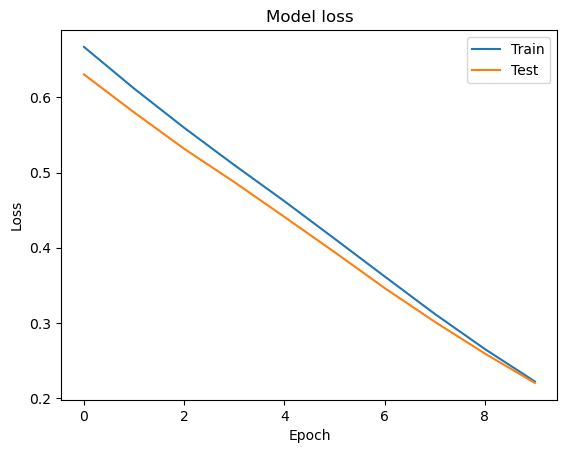

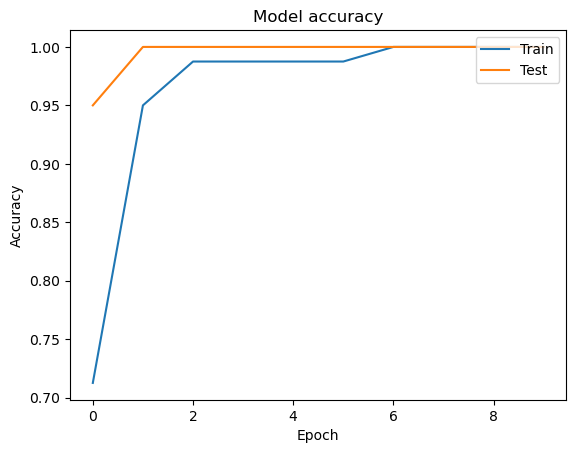

In [6]:
# Keras version of Iris classifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras_visualizer import visualizer
# loading and pre-processing of the data
# We use the 2 class version of iris data set
iris = pd.read_csv("IrisTwoClass.csv")
x = np.array(iris.drop("Class",axis=1))
y = np.array(iris["Class"])
# Split dataset into train / test
x_train, x_test, y_train, y_test = model_selection.train_test_split(
x, y, test_size=0.2, random_state=42)
# Scale data (training set) to 0 mean and unit standard deviation.
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
# create model
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])
# training the model
h_callback= model.fit(x_train, y_train, epochs=10, batch_size=10,validation_data=(x_test,y_test))
# eval model
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# calculate predictions
predictions = model.predict(x_test)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

visualizer(model, format='png', view=True)

### Iris Classifier with added neurons

Epoch 1/20
8/8 [==============================] - 1s 51ms/step - loss: 0.7973 - accuracy: 0.3750 - val_loss: 0.6511 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 0.5550 - accuracy: 0.7875 - val_loss: 0.4831 - val_accuracy: 0.9500
Epoch 3/20
8/8 [==============================] - 0s 6ms/step - loss: 0.4113 - accuracy: 0.9750 - val_loss: 0.3803 - val_accuracy: 1.0000
Epoch 4/20
8/8 [==============================] - 0s 7ms/step - loss: 0.3230 - accuracy: 0.9875 - val_loss: 0.3140 - val_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 0s 7ms/step - loss: 0.2654 - accuracy: 1.0000 - val_loss: 0.2687 - val_accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 0s 7ms/step - loss: 0.2256 - accuracy: 1.0000 - val_loss: 0.2358 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 0s 7ms/step - loss: 0.1965 - accuracy: 1.0000 - val_loss: 0.2109 - val_accuracy: 1.0000
Epoch 8/20
8/8 [=================

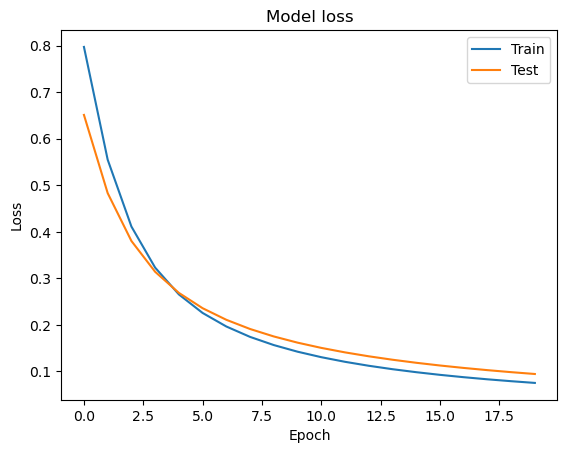

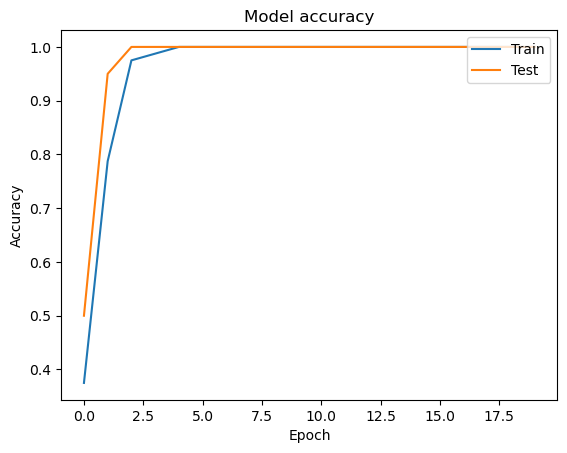

In [7]:
# Keras version of Iris classifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing
import pandas as pd
import numpy as np
# loading and pre-processing of the data
# We use the 2 class version of iris data set
iris = pd.read_csv("IrisTwoClass.csv")
x = np.array(iris.drop("Class",axis=1))
y = np.array(iris["Class"])
# Split dataset into train / test
x_train, x_test, y_train, y_test = model_selection.train_test_split(
x, y, test_size=0.2, random_state=42)
# Scale data (training set) to 0 mean and unit standard deviation.
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
# create model
model = Sequential()
model.add(Dense(32, input_dim=4, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd',
metrics=['accuracy'])
# training the model

h_callback = model.fit(x_train, y_train, epochs = 20, batch_size=10,
               validation_data=(x_test, y_test))
# eval model
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# calculate predictions
predictions = model.predict(x_test)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)


# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


## Added layers and neurons

Epoch 1/10
8/8 [==============================] - 1s 33ms/step - loss: 0.6782 - accuracy: 0.5750 - val_loss: 0.6597 - val_accuracy: 0.6000
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 0.6373 - accuracy: 0.7750 - val_loss: 0.6198 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 0.5783 - accuracy: 0.9625 - val_loss: 0.5616 - val_accuracy: 0.9000
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 0.4949 - accuracy: 1.0000 - val_loss: 0.4789 - val_accuracy: 0.9000
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.3894 - accuracy: 1.0000 - val_loss: 0.3776 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.2773 - accuracy: 1.0000 - val_loss: 0.2729 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 0s 10ms/step - loss: 0.1753 - accuracy: 1.0000 - val_loss: 0.1902 - val_accuracy: 0.9500
Epoch 8/10
8/8 [================

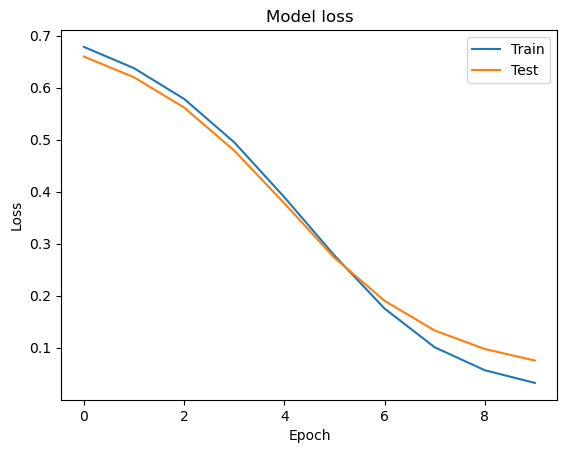

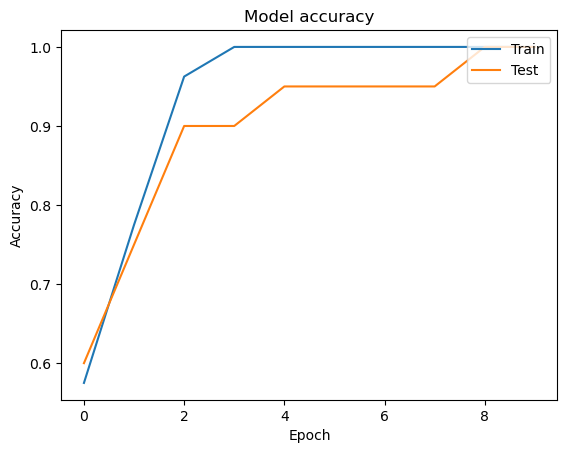

In [8]:
# Keras version of Iris classifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing
import pandas as pd
import numpy as np
# loading and pre-processing of the data
# We use the 2 class version of iris data set
iris = pd.read_csv("IrisTwoClass.csv")
x = np.array(iris.drop("Class",axis=1))
y = np.array(iris["Class"])
# Split dataset into train / test
x_train, x_test, y_train, y_test = model_selection.train_test_split(
x, y, test_size=0.2, random_state=42)
# Scale data (training set) to 0 mean and unit standard deviation.
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
# create model
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])
# training the model

h_callback = model.fit(x_train, y_train, epochs = 10, batch_size=10,
               validation_data=(x_test, y_test))
# eval model
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# calculate predictions
predictions = model.predict(x_test)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)


# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


# Conclusion 

> The neural network with just added neurons was the best out of the 3 that I tried and also take up less computation power as compared to the 3rd. Having too much layers like the 3rd model that I tried caused overfitting as shown in the learning rate.

# Keras Function API

In [9]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
# This returns a tensor
inputs = Input(shape=(4,))
# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train,epochs=10, batch_size=10) # starts trainin

Epoch 1/10
8/8 [==============================] - 1s 3ms/step - loss: 0.4805 - accuracy: 1.0000
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.2793 - accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.1063 - accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 1.0000
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 1.0000
